### TEST EJECUTABLE Cargando Modelo ya entrenado, basado en la red SVM

In [1]:
import numpy as np 
import pandas as pd 
import os
import random
import random as python_random
from PIL import Image
from pathlib import Path
import seaborn as sns
import itertools
import joblib
from PIL import Image
import os, os.path

In [2]:
from __future__ import print_function, division
from builtins import range, input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

from keras import models
from keras import layers
from keras import optimizers
import os
from tqdm import tqdm
import tensorflow as tf

In [3]:
import joblib

In [4]:
tamaño_imagen=150
IMG_SIZE = (tamaño_imagen, tamaño_imagen,3) #28
shape=[tamaño_imagen,tamaño_imagen,3]
epocas=10
modelo_nombre='svm'
umbral=0.5  
input_folder = 'dataset'  
output_folder= 'dividido'
modelos_folder='modelos/'
train_dir = output_folder+"/train"
val_dir = output_folder+"/val"
test_dir = "/test"
ratio_entreno=0.8
ratio_val=0.1
ratio_test=0.1
colores='rgb' #  alternativa   colores='rgb'
batch_size = 1

In [5]:
def carga_imagen():
    imgs = []
    path = "test/imagenes"
    valid_images = [".jpg",".gif",".png",".tga"]
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        imgs.append(Image.open(os.path.join(path,f)))
    return imgs[0]

In [6]:
def extract_features(directory, sample_count):
    # memoria para tensores con datos y etiquetas
    features  = np.zeros(shape=(sample_count, 4, 4, 512))
    labels    = np.zeros(shape=(sample_count))
    # instanciación del generador a partir del directorio donde estan las clases
    generator = datagen.flow_from_directory(directory,
                                            target_size = (150, 150),
                                            batch_size  = batch_size,
                                            class_mode  = None,
                                            classes  = None)
    
    rango = list(range(int(sample_count/batch_size)))
    i = 0
    with tqdm(total=len(rango)) as pbar:
        for inputs_batch in tqdm(generator):

            features_batch = conv_base.predict(inputs_batch)
            # datos y etiquetas
            features[i * batch_size : (i + 1) * batch_size] = features_batch
            #labels  [i * batch_size : (i + 1) * batch_size] = labels_batch
            i += 1 
            if i * batch_size >= sample_count:
                # La ejecucion del generador debe terminarse explícitamente después 
                # usar todas la imágenes
                break
            pbar.update(1)

    return features

In [7]:
datagen = ImageDataGenerator(#rescale=1./255)
                             preprocessing_function=preprocess_input)

In [8]:
vgg16=None
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(IMG_SIZE)
              )

## Colocamos la imagen a comprobar dentro de /test/imagenes

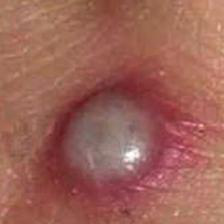

In [9]:
img=carga_imagen()
img

In [10]:
test_feature=extract_features('test/', 1)

Found 1 images belonging to 1 classes.


  0%|          | 0/1 [00:02<?, ?it/s]


In [11]:
test_feature      = np.reshape(test_feature[0],       (1, 4 * 4 * 512))

In [12]:
svm = joblib.load('modelos/svm_exfi.pkl')

In [13]:
y_pred=svm.predict(test_feature)
if y_pred==0.0:  
    resultado="Negativo"
else:
    resultado="Positivo"
print("El Resultado del test es: ",resultado)

El Resultado del test es:  Positivo
